In [1]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(scales)
library(knitr)
library(IRdisplay)
options(repr.plot.width=7, repr.plot.height=4)
isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
# filtered version of paired positions
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X17b'='17b', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'Absent')

colors = c('A'='gray20', 'C'='gray20', 'G'='gray20', 'U'='gray20', 'Absent'='gray20', 'Purine'='gray20', 'Pyrimidine'='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired'='gray20', 'Bulge'='gray20', 'Mismatched'='gray20')
fills = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8', 'Purine'='#ff8300', 'Pyrimidine'='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B'='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'Absent'='gray60', 'Mismatched'='gray30', 'Paired'='#ffffcc')

# simple codes for reviewer #3
simple_identities = c('A' = 'A', 'C' = 'C', 'G' = 'G', 'U' = 'U', 'Purine' = 'Purine', 'Pyrimidine' = 'Pyrimidine', 
                      'Weak' = 'A/U', 'Strong' = 'G/C', 'Amino' = 'A/C', 'Keto' = 'G/U', 
                      'B' = 'C/G/U', 'D' = 'A/G/U', 'H' = 'A/C/U', 'V' = 'A/C/G', 'Absent' = 'Absent')
colors = c(colors, 'A/U' = 'gray20', 'G/C' = 'gray20', 'A/C' ='gray20', 'G/U' = 'gray20', 'C/G/U' = 'gray50', 'A/G/U' = 'gray50', 'A/C/U' = 'gray50', 'A/C/G' = 'gray50')
fills = c(fills, 'A/U' = '#b3de69', 'G/C' = '#fb72b2', 'A/C' ='#c1764a', 'G/U' = '#b26cbd', 'C/G/U' = '#e5c494', 'A/G/U' = '#ccebd5', 'A/C/U' = '#ffa79d', 'A/C/G' = '#a6cdea')

In [66]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% filter(isotype %in% isotypes)

In [3]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-specific-freqs.RData')

## Quality set stats

In [4]:
df = identities %>% group_by(isotype, clade, quality) %>% 
  summarize(count=n()) %>%
  ungroup()
df = rbind(df, cbind(expand.grid(isotype=unique(df$isotype), clade=unique(df$clade), quality=unique(df$quality)), count=0))
df %>% group_by(isotype, clade, quality) %>% 
  summarize(count=sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(rev(quality)) %>%
  summarize(count=paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

clade,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,iMet,Leu,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val
Fungi,766 (13),824 (54),413 (5),529 (0),198 (5),434 (2),551 (24),848 (7),213 (4),575 (25),185 (0),855 (11),737 (105),213 (31),413 (0),519 (0),864 (7),698 (9),220 (3),217 (89),784 (6)
Insecta,329 (1416),395 (16),154 (20),246 (9),124 (16),217 (0),328 (3),383 (27),132 (0),210 (19),110 (0),398 (6),355 (5),121 (4),148 (22),291 (15),338 (3654),317 (9),122 (6),178 (7),311 (25)
Mammalia,2347 (657),1226 (13),673 (6),503 (8),1141 (15),647 (0),920 (1),1240 (3),368 (0),692 (31),405 (0),1144 (1),1448 (0),379 (0),473 (2),777 (1),1185 (6),876 (1),337 (0),495 (6),1588 (12)
Nematoda,382 (0),411 (15),200 (0),241 (0),128 (0),243 (0),407 (0),449 (0),162 (0),244 (18),96 (0),419 (4),435 (3),112 (0),151 (0),414 (0),370 (57),353 (0),124 (0),172 (1),316 (7)
Spermatophyta,767 (4),696 (23),391 (9),478 (14),256 (4),368 (0),596 (3),804 (7),217 (1),510 (1),204 (0),832 (18),639 (7),262 (15),314 (17),679 (9),807 (26),458 (27),251 (21),342 (4),625 (2)
Vertebrata,841 (0),1158 (1),1075 (7),483 (3),452 (10),709 (0),926 (0),1117 (3),379 (3),678 (0),450 (0),1580 (2),1637 (0),548 (0),421 (8),946 (3),1717 (16),906 (13),280 (0),526 (8),1025 (7)


### Restricted set stats

In [5]:
df = identities %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", clade = "Total", count = sum(count)) %>% ungroup)

df %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

clade,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,iMet,Leu,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val,Total
Fungi,259 (520),394 (484),144 (274),88 (441),108 (95),197 (239),148 (427),235 (620),83 (134),172 (428),76 (109),379 (487),224 (618),116 (128),139 (274),190 (329),383 (488),316 (391),87 (136),110 (196),319 (471),4167 (7289)
Insecta,140 (1605),194 (217),54 (120),56 (199),72 (68),96 (121),83 (248),112 (298),29 (103),105 (124),33 (77),185 (219),95 (265),51 (74),52 (118),100 (206),203 (3789),134 (192),40 (88),109 (76),140 (196),2083 (8403)
Mammalia,982 (2022),867 (372),287 (392),158 (353),593 (563),350 (297),465 (456),515 (728),76 (292),362 (361),88 (317),714 (431),739 (709),275 (104),228 (247),220 (558),688 (503),670 (207),234 (103),307 (194),572 (1028),9390 (10237)
Nematoda,95 (287),142 (284),36 (164),30 (211),26 (102),66 (177),81 (326),99 (350),28 (134),61 (201),18 (78),152 (271),71 (367),28 (84),35 (116),86 (328),151 (276),113 (240),29 (95),46 (127),108 (215),1501 (4433)
Spermatophyta,201 (570),321 (398),166 (234),107 (385),107 (153),160 (208),155 (444),180 (631),39 (179),178 (333),45 (159),294 (556),213 (433),85 (192),82 (249),181 (507),302 (531),241 (244),69 (203),142 (204),211 (416),3479 (7229)
Vertebrata,306 (535),371 (788),187 (895),75 (411),186 (276),216 (493),277 (649),250 (870),85 (297),211 (467),71 (379),458 (1124),294 (1343),139 (409),179 (250),185 (764),415 (1318),370 (549),134 (146),187 (347),301 (731),4897 (13041)
Total,1983 (5539),2289 (2543),874 (2079),514 (2000),1092 (1257),1085 (1535),1209 (2550),1391 (3497),340 (1139),1089 (1914),331 (1119),2182 (3088),1636 (3735),694 (991),715 (1254),962 (2692),2142 (6905),1844 (1823),593 (771),901 (1144),1651 (3057),25517 (50632)


## Consensus elements by cutoff table

In [6]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 126) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>%
           select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [7]:
cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_ac_freqs %>%
    group_by(isotype, clade, positions, variable) %>%
    summarize(count=sum(value), freq=sum(value)/sum(total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff=as.character(cutoff)) %>%
    select(isotype, clade, positions, variable, freq, cutoff) %>%
    group_by(isotype, clade, positions) %>%
    arrange(code_groups[variable], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}
cutoff_freqs = cutoff_freqs %>% 
  group_by(positions, cutoff) %>%
  summarize(identity = get_consensus_IDE(positions, variable)) %>%
  select(positions, cutoff, identity) %>% 
  filter(positions %in% c(names(single_positions), names(paired_positions))) %>%
  spread(cutoff, identity)

In [8]:
cutoff_freqs %>% filter(`0.5` != "N/A")

,positions,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1
1,X1.72,Paired,Paired,Paired,N/A,N/A,N/A,N/A,N/A
2,X10.25,Paired,Paired,Paired,Paired,Paired,Paired,N/A,N/A
3,X11.24,Paired,Paired,Paired,Paired,Paired,Paired,N/A,N/A
4,X14,A,A,A,A,A,A,N/A,N/A
5,X18,V,V,V,V,V,V,N/A,N/A
6,X19,G,G,G,G,G,G,N/A,N/A
7,X19.56,GC,GC,GC,GC,GC,N/A,N/A,N/A
8,X28.42,Paired,Paired,Paired,Paired,Paired,N/A,N/A,N/A
9,X30.40,Paired,Paired,Paired,Paired,N/A,N/A,N/A,N/A
10,X32,Pyrimidine,Pyrimidine,Pyrimidine,B,B,N/A,N/A,N/A


# Isotype-specific heatmaps

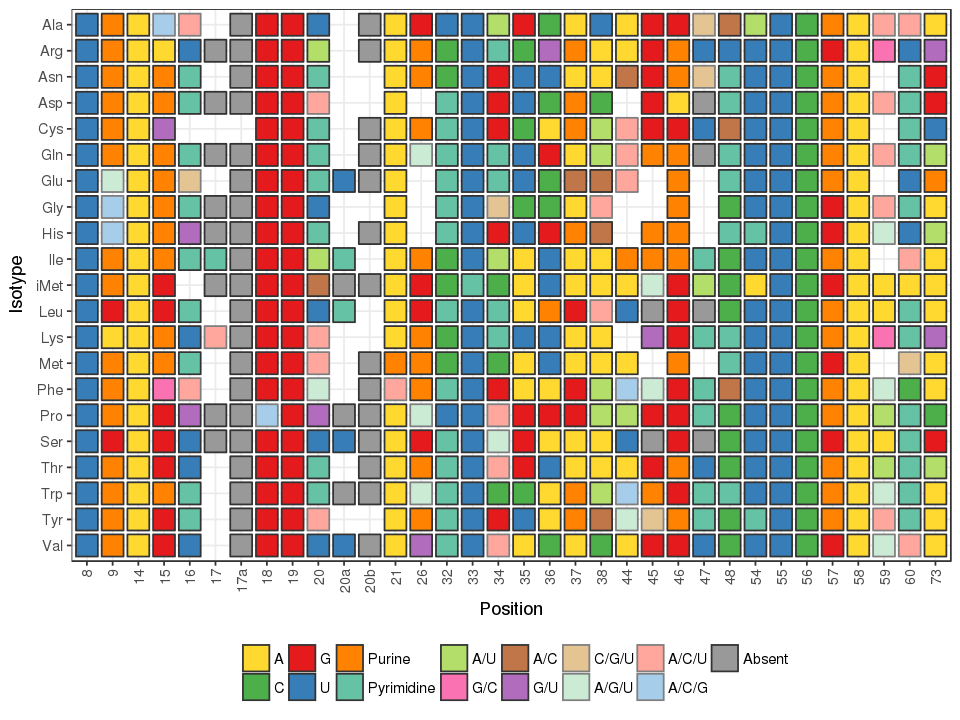

In [9]:
options(repr.plot.width=8, repr.plot.height=6)
isotype_specific %>% 
  filter(!str_detect(positions, '\\.')) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.5) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    xlab('Position') + ylab('Isotype')

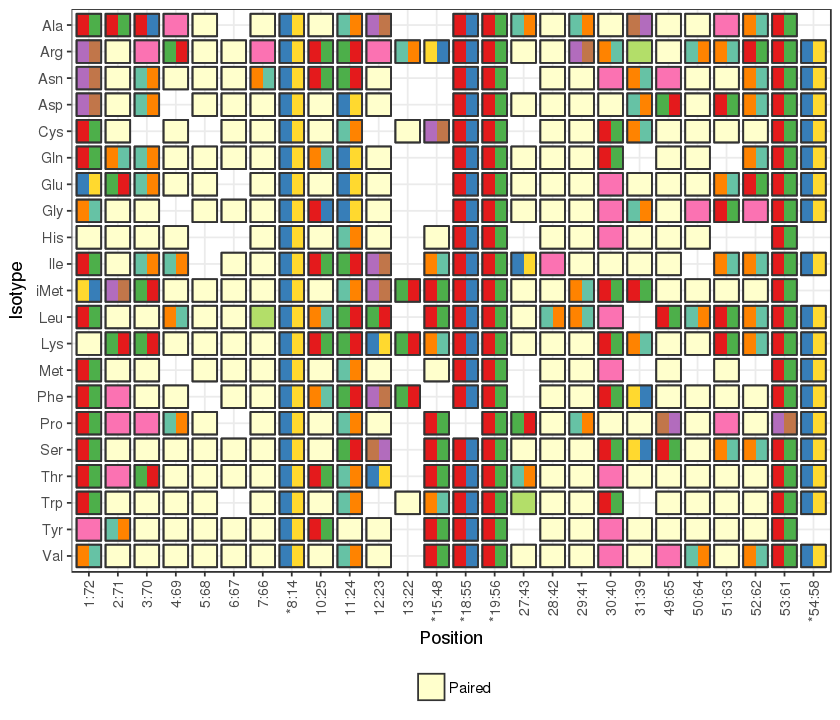

In [55]:
options(repr.plot.width=7, repr.plot.height=6)
get_5prime = Vectorize(function(identity) c("GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])
get_3prime = Vectorize(function(identity) c("GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])

isotype_specific %>% 
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.5) +
    scale_x_discrete(labels=paired_positions) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE) +    
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),          
      legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

# Clade-isotype-specific heatmaps

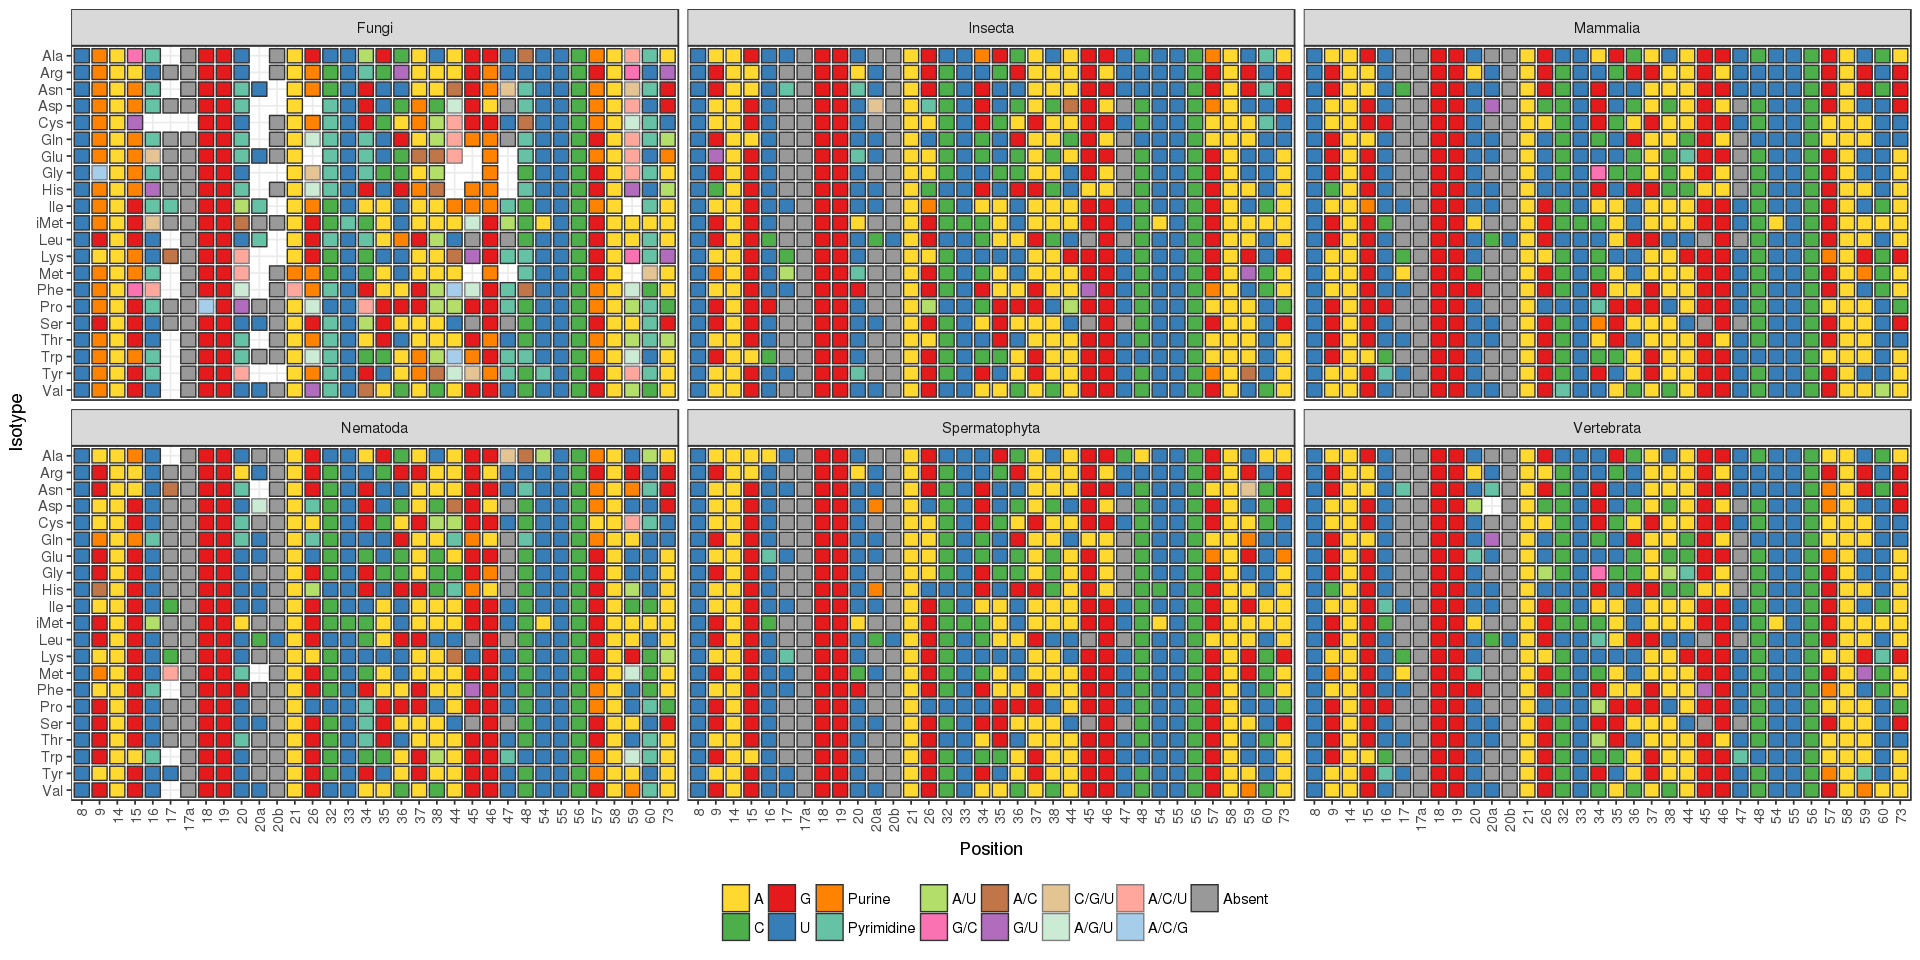

In [62]:
options(repr.plot.width=16, repr.plot.height=8)
clade_isotype_specific %>%
  filter(!(str_detect(positions, '\\.')) & positions %in% names(single_positions)) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ungroup() %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.4) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

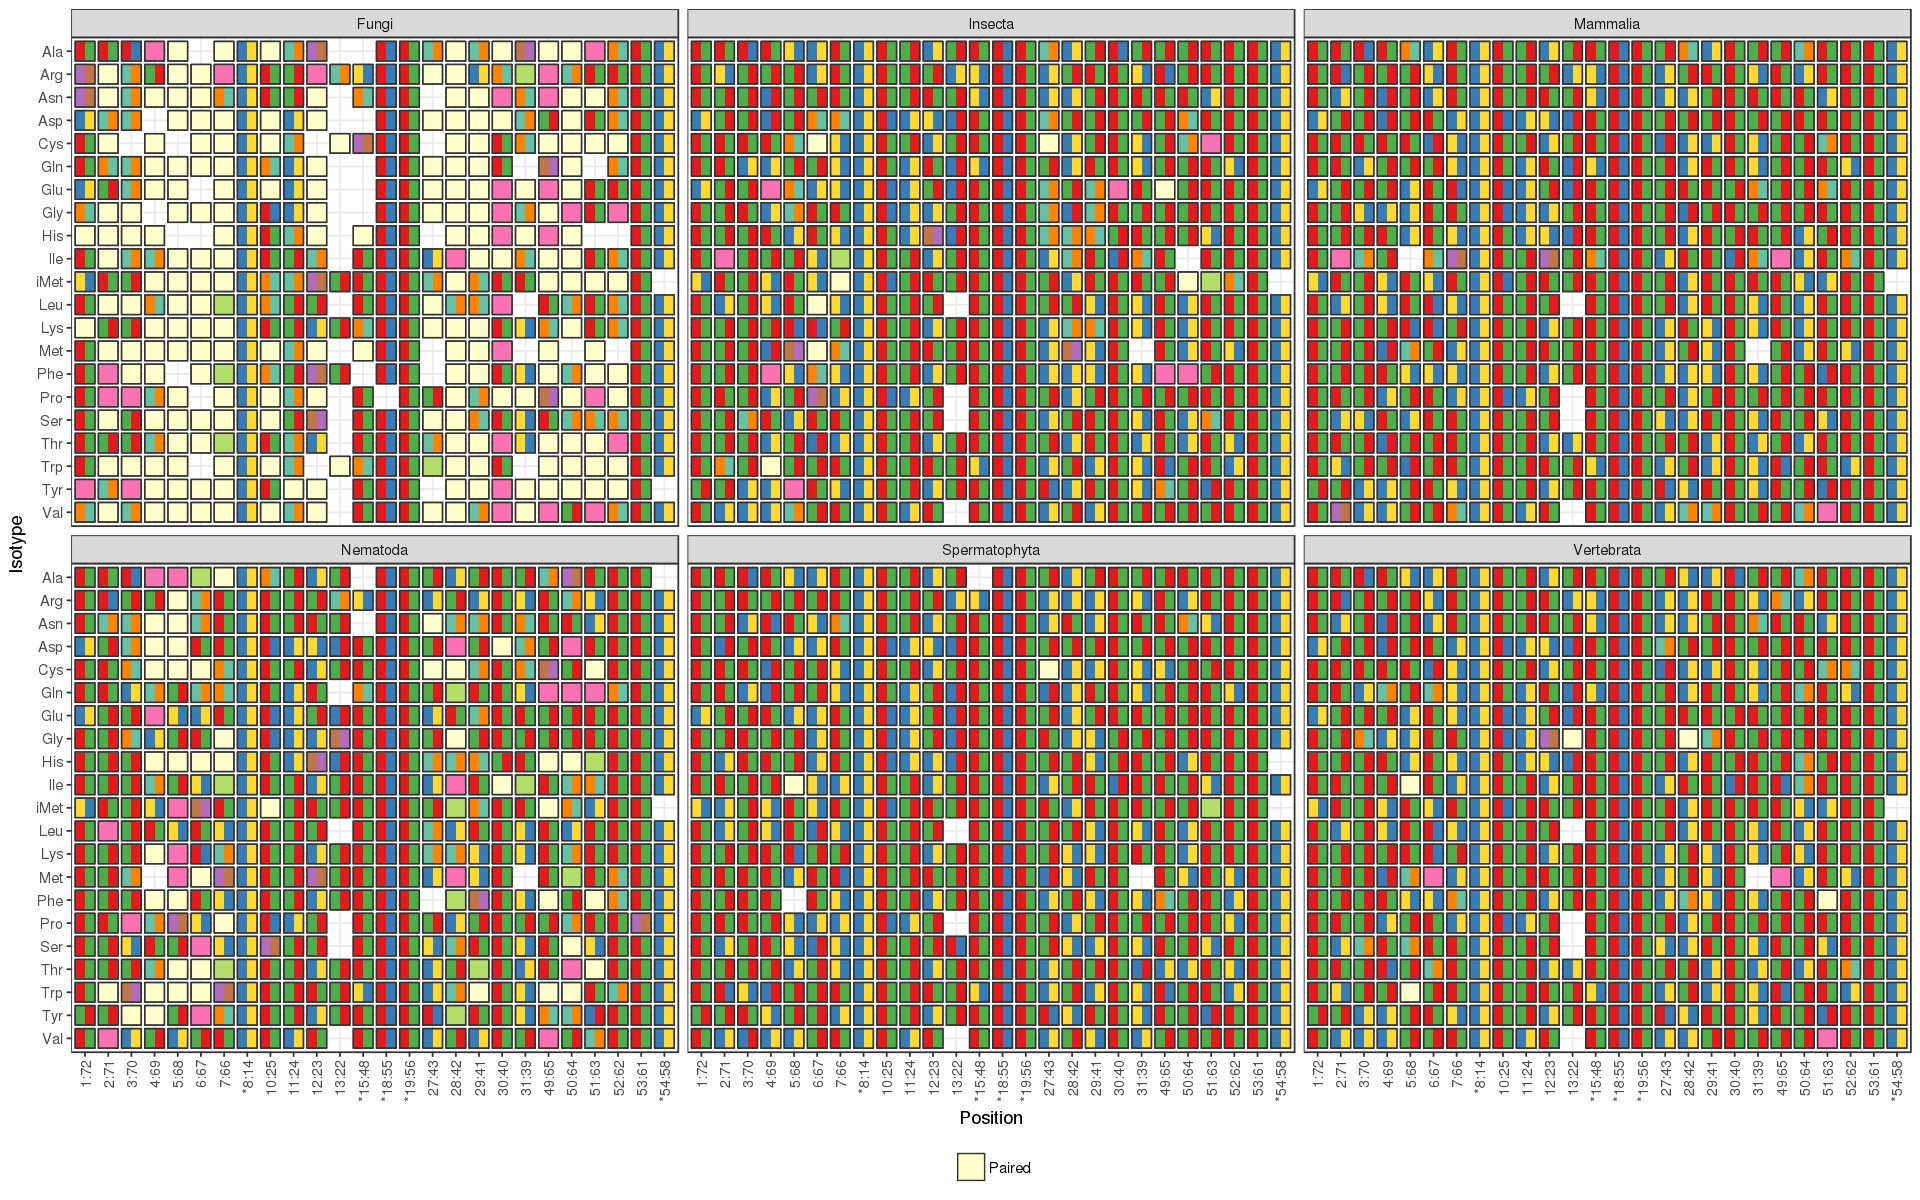

In [63]:
options(repr.plot.width=16, repr.plot.height=10)
clade_isotype_specific %>%
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.4) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=paired_positions) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    xlab('Position') + ylab('Isotype') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="bottom") +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE)

# tRNA features

## D-loop insertions

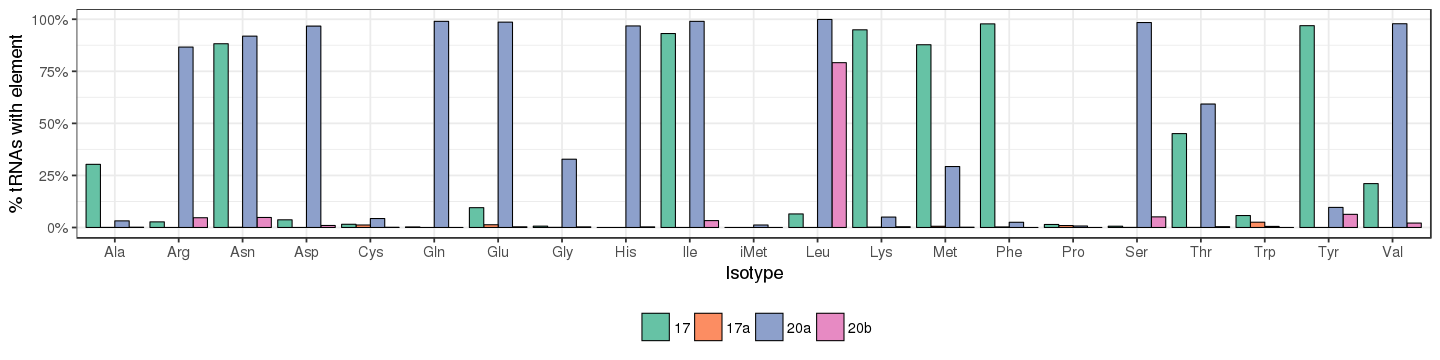

In [75]:
options(repr.plot.width=12, repr.plot.height=3)
identities %>% filter(!restrict) %>%
  select(isotype, X17, X17a, X20a, X20b) %>%
  mutate(X17=X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype) %>%
  summarize(`17`=mean(X17), `17a`=mean(X17a), `20a`=mean(X20a), `20b`=mean(X20b)) %>%
  melt(id.vars='isotype') %>%
  ggplot() + geom_bar(aes(x=isotype, y=value, fill=variable), stat='identity', color='black', size=0.3, position='dodge') +
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("% tRNAs with element") +
    guides(fill=guide_legend(title=NULL))

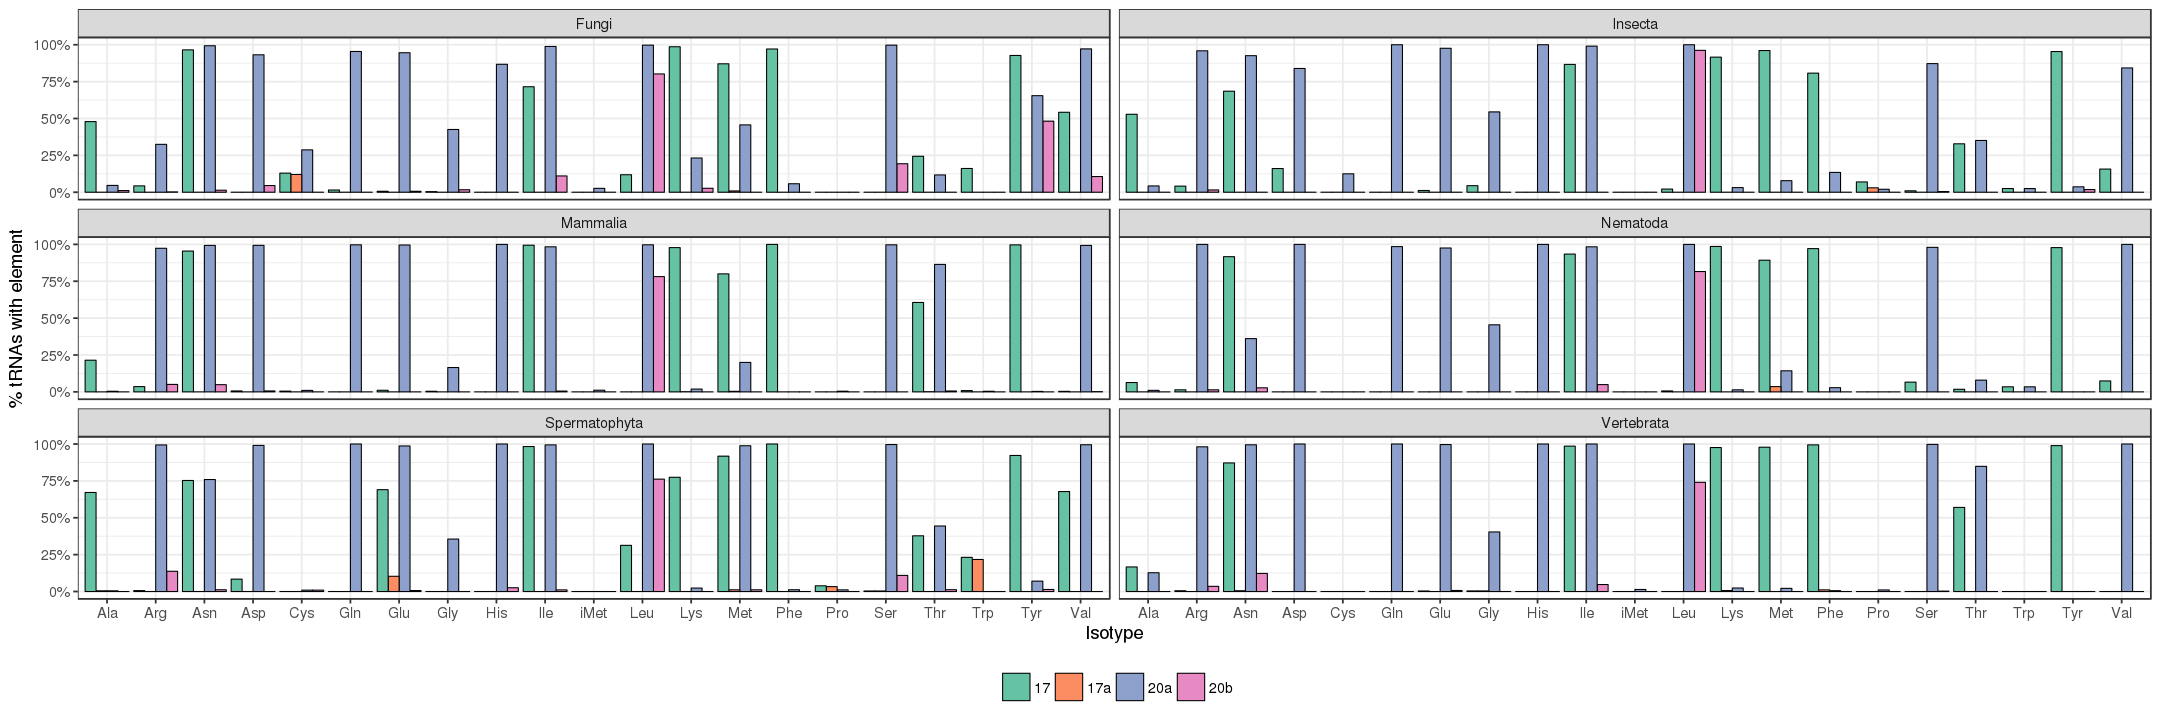

In [81]:
options(repr.plot.width=18, repr.plot.height=6)
identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17=X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype, clade) %>%
  summarize(`17`=mean(X17), `17a`=mean(X17a), `20a`=mean(X20a), `20b`=mean(X20b)) %>%
  gather(position, freq, -isotype, -clade) %>%
  ggplot() + geom_bar(aes(x=isotype, y=freq, fill=position), stat='identity', color='black', size=0.3, position='dodge') +
    facet_wrap(~ clade, ncol = 2) +
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("% tRNAs with element") +
    guides(fill=guide_legend(title=NULL))

## 3D interactions

In [73]:
tertiary_interactions = identities %>% filter(!restrict) %>%
  select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  rbind(identities %>%
    select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
    mutate(isotype='All')) %>%
  gather(positions, identity, -isotype) %>%
  group_by(isotype, positions) %>%
  mutate(freq=n()) %>%
  ungroup() %>%
  group_by(isotype, positions, identity, freq) %>%
  summarize(count=n()) %>%
  mutate(freq=count/freq) %>%
  filter(freq > 0.05) %>%
  ungroup() %>%
  mutate(positions=factor(positions)) %>%
  mutate(identity=factor(identity, levels=c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "G:-", "U:-", "C:-"))) %>%
  select(-count)

Warning message:
“attributes are not identical across measure variables; they will be dropped”

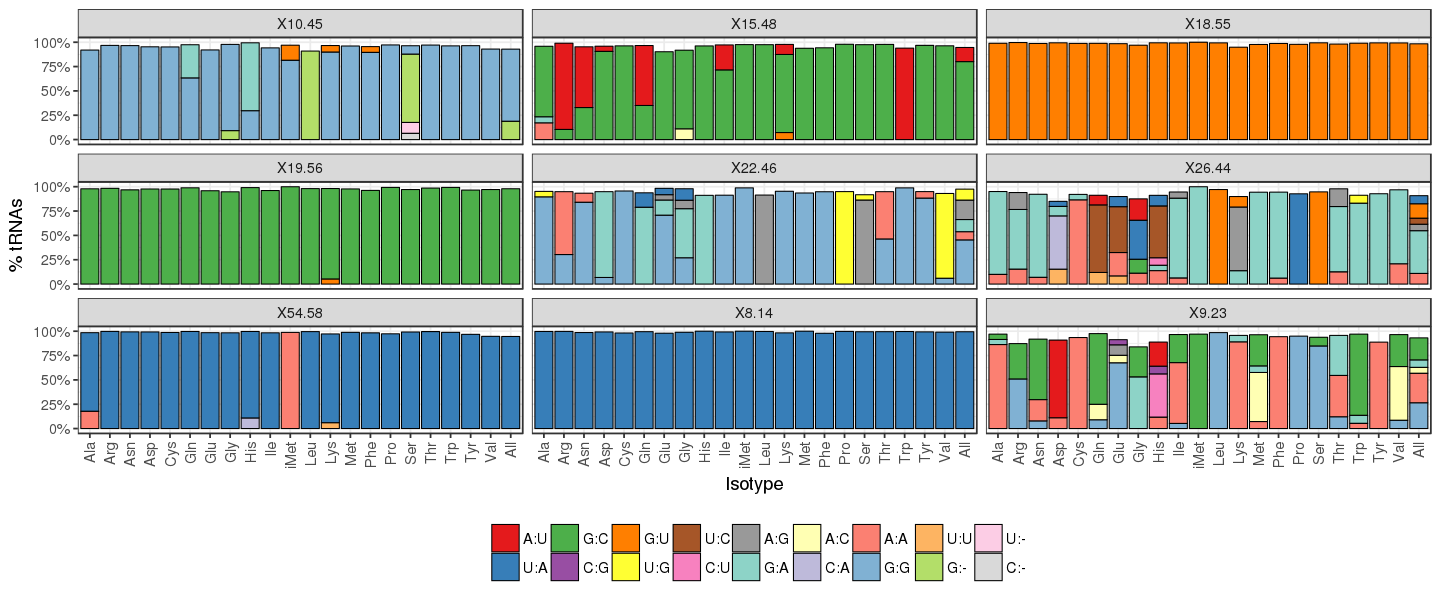

In [74]:
options(repr.plot.width=12, repr.plot.height=5)
tertiary_interactions %>% ggplot() +
  geom_bar(aes(x=isotype, y=freq, fill=identity), color='black', size=0.3, stat='identity') +
  facet_wrap(~ positions, nrow=3) +
  scale_fill_manual(values=c(brewer.pal(9, "Set1"), brewer.pal(9, "Set3"))) + 
  scale_y_continuous(labels=percent_format()) +
  xlab("Isotype") + ylab("% tRNAs") +
  theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
  guides(fill=guide_legend(title=NULL, nrow=2))

### N1/N73

Warning message:
“attributes are not identical across measure variables; they will be dropped”

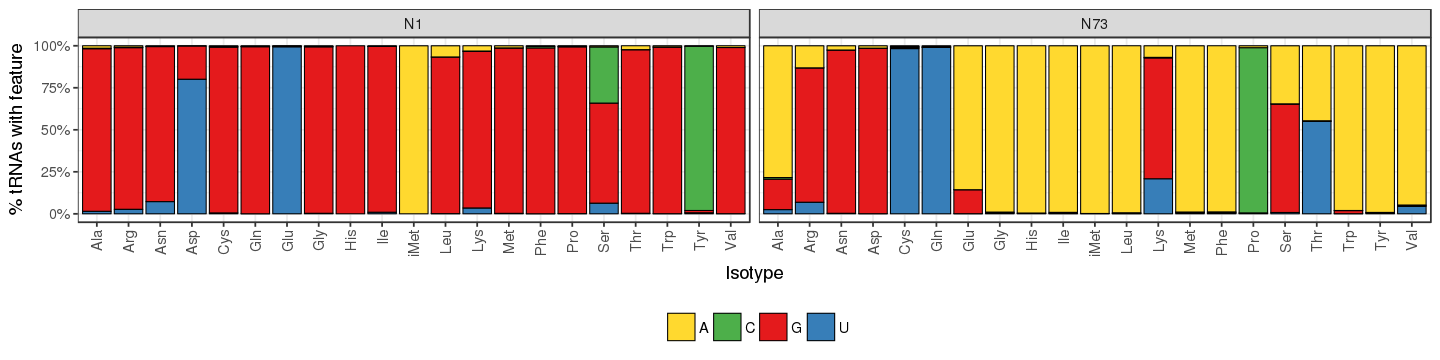

In [20]:
options(repr.plot.width=12, repr.plot.height=3)
identities %>% select(isotype, X1, X73)%>%
  gather(position, identity, X1, X73) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(isotype, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, position) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ position) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

Warning message:
“attributes are not identical across measure variables; they will be dropped”

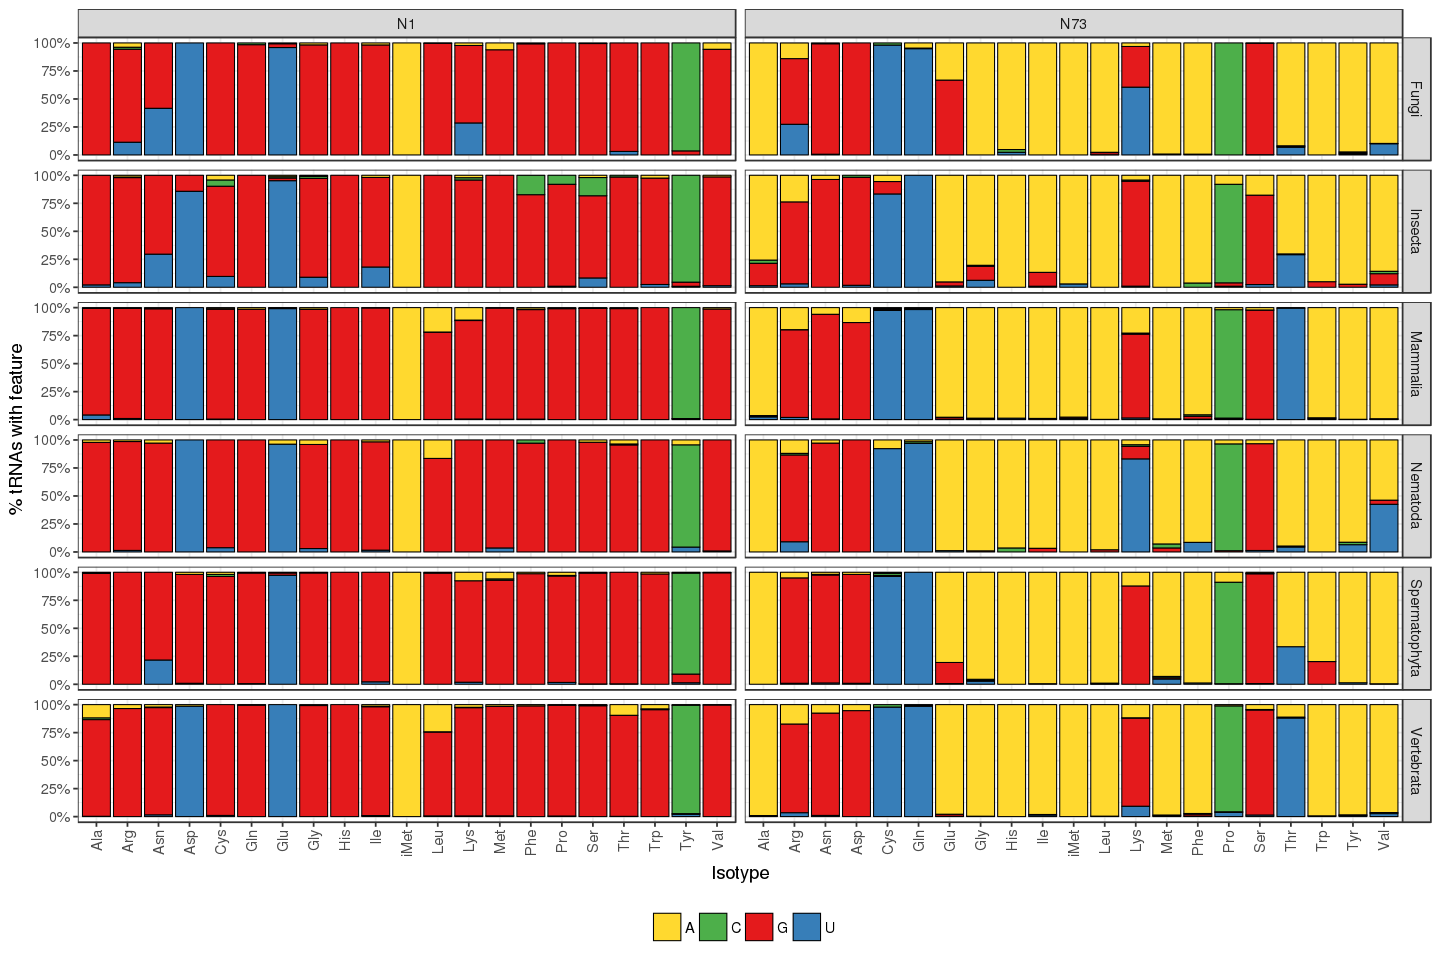

In [86]:
options(repr.plot.width=12, repr.plot.height=8)
identities %>% filter(!restrict) %>%
  select(isotype, clade, X1, X73)%>%
  gather(position, identity, X1, X73, -clade) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, clade, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade, position) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_grid(clade ~ position, scales = 'free') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

### Anticodon incidence

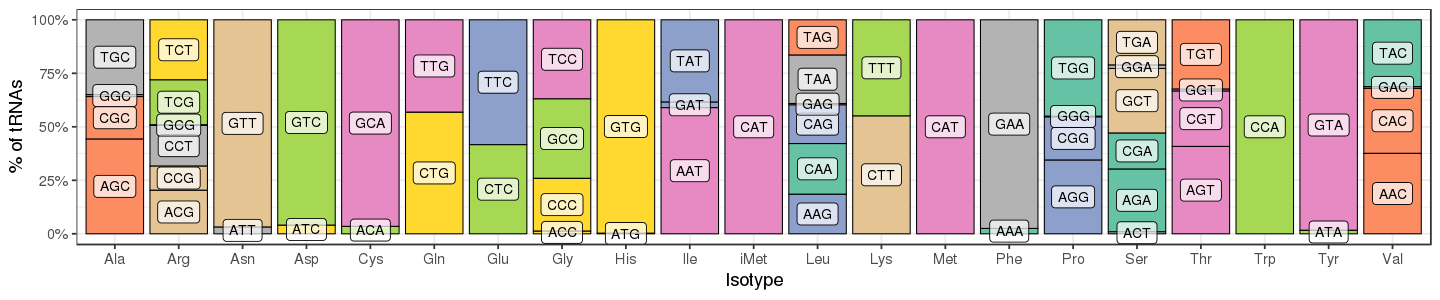

In [72]:
options(repr.plot.width=12, repr.plot.height=2.5)
identities %>% 
  filter(!restrict & !(isotype %in% c("Sup", "SeC") | anticodon %in% c('SAG', 'RCT'))) %>%
  group_by(isotype, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.001) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = rep(x = brewer.pal(8, "Set2"), 10)) + 
    scale_y_continuous(labels = percent)

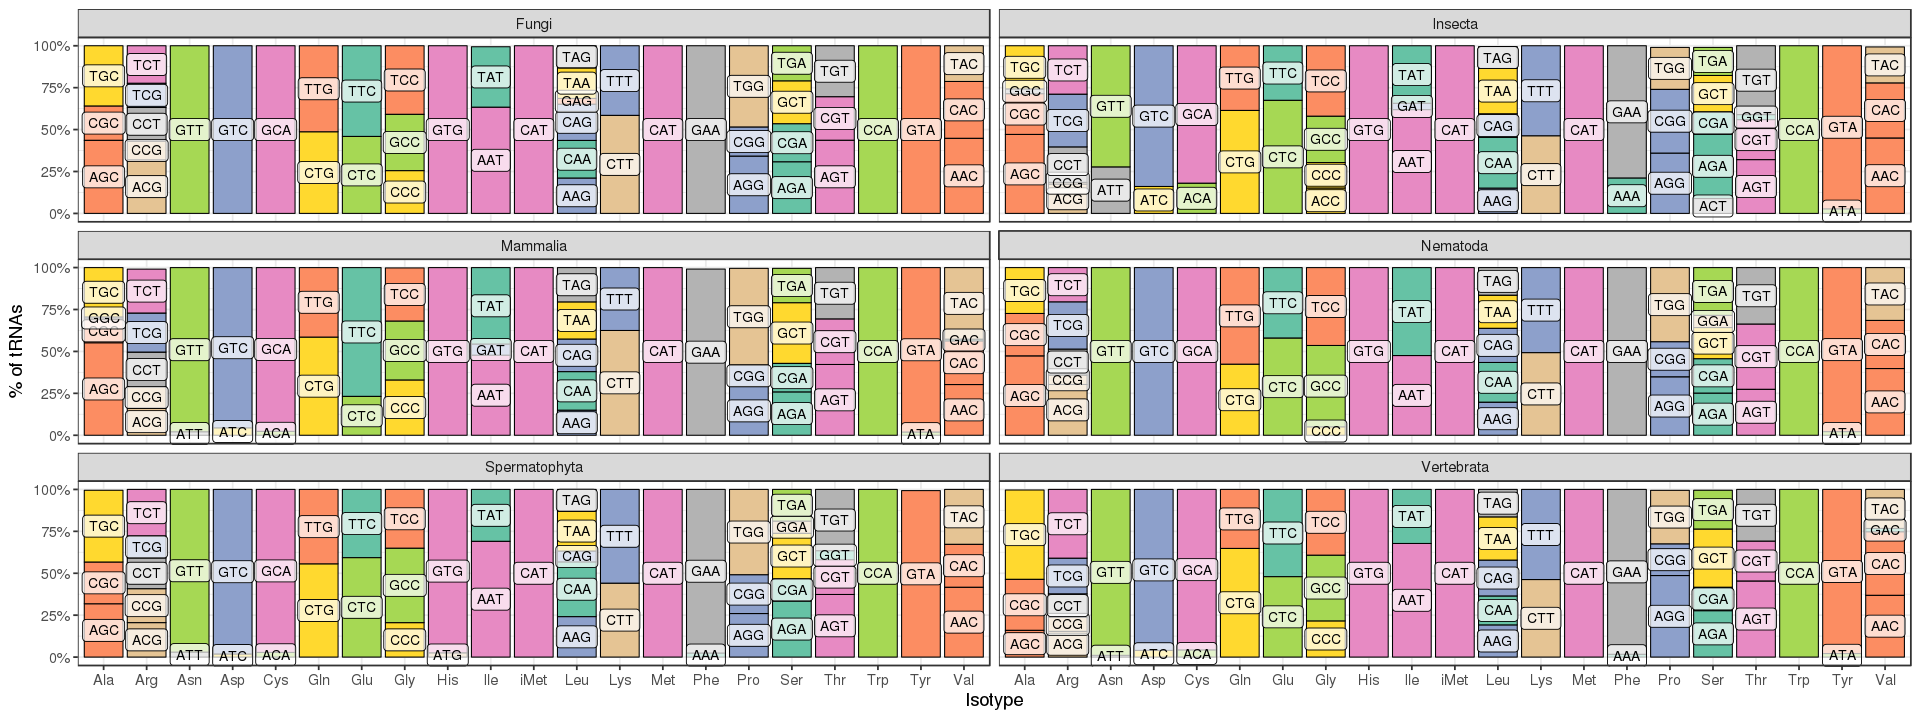

In [90]:
options(repr.plot.width=16, repr.plot.height=6)
identities %>% 
  filter(!restrict) %>%
  group_by(isotype, clade, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    facet_wrap(~ clade, ncol = 2) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = rep(x = brewer.pal(8, "Set2"), 10)) + 
    scale_y_continuous(labels = percent)

## A and B box motifs

Warning message:
“attributes are not identical across measure variables; they will be dropped”

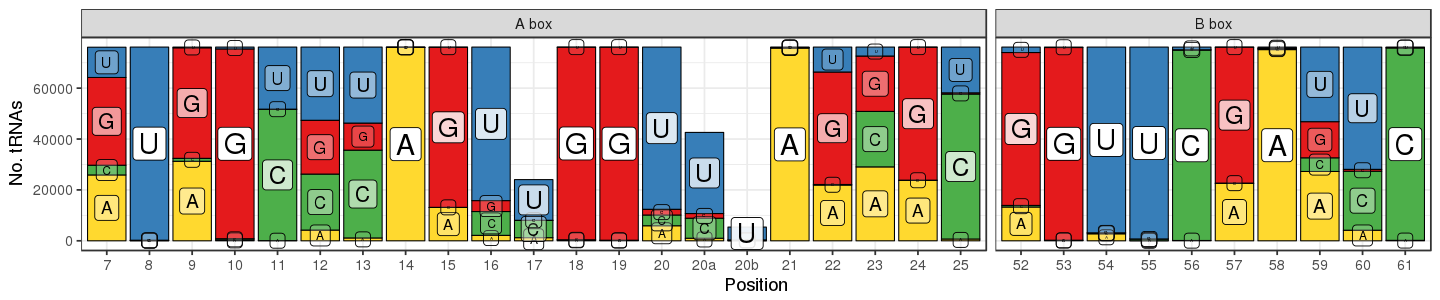

In [22]:
options(repr.plot.width=12, repr.plot.height=2.5)
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
identities %>% 
  select(isotype, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  ggplot() + geom_bar(aes(x = Position, y = Count, fill = Identity), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = Position, y = Count, label = Identity, size = freq, alpha = freq), position = position_stack(vjust = 0.5, reverse = FALSE)) +
    scale_x_discrete(labels = ab_positions) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    theme(legend.position='none') +
    labs(fill = '', y = 'No. tRNAs')         

Warning message:
“attributes are not identical across measure variables; they will be dropped”

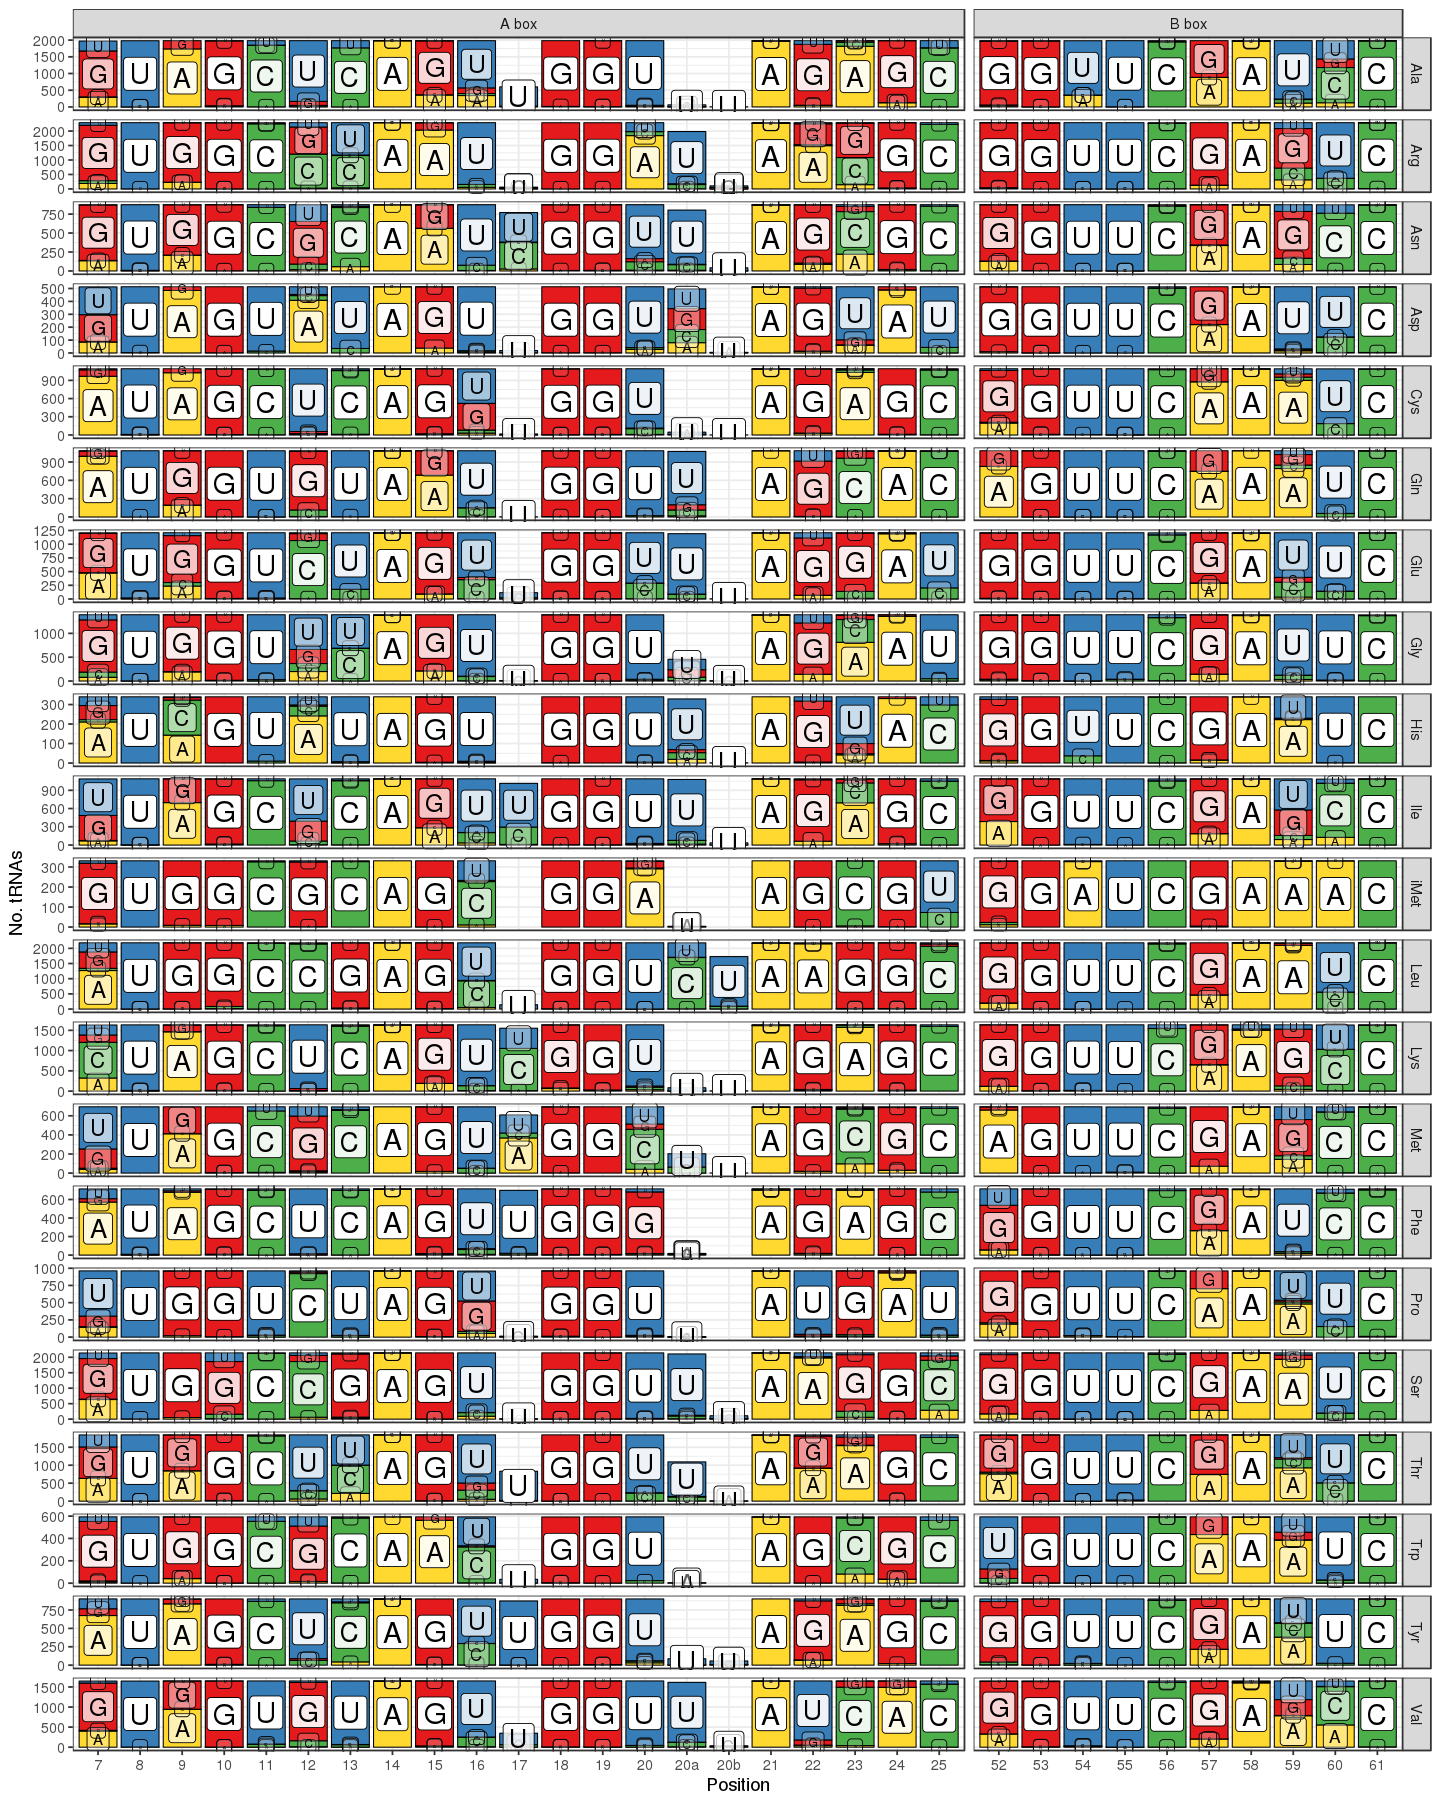

In [93]:
options(repr.plot.width=12, repr.plot.height=15)
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
identities %>% filter(!restrict) %>%
  select(isotype, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity, isotype) %>%
  summarize(Count = n()) %>%
  group_by(Position, isotype) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  ggplot() + geom_bar(aes(x = Position, y = Count, fill = Identity), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = Position, y = Count, label = Identity, size = freq, alpha = freq), position = position_stack(vjust = 0.5, reverse = FALSE)) +
    scale_x_discrete(labels = ab_positions) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    facet_grid(isotype ~ feature, scales = 'free', space = 'free_x') +
    theme(legend.position='none') +
    labs(fill = '', y = 'No. tRNAs')         

In [23]:
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
df = identities %>% 
  select(isotype, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax))))

Warning message:
“attributes are not identical across measure variables; they will be dropped”

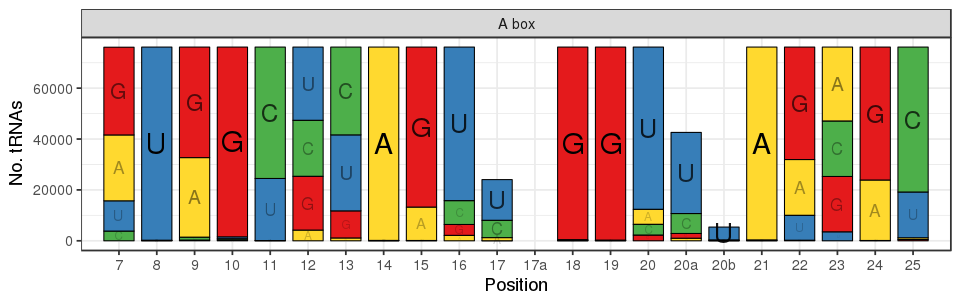

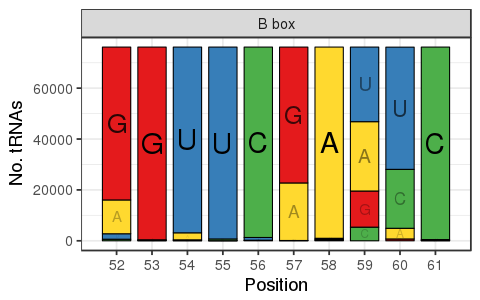

In [24]:
options(repr.plot.width=8, repr.plot.height=2.5)
df %>% filter(feature == "A box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 1:22, labels = c('7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '22', '23', '24', '25')) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

options(repr.plot.width=4, repr.plot.height=2.5)
df %>% filter(feature == "B box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 23:32, labels = c('52', '53', '54', '55', '56', '57', '58', '59', '60', '61')) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

# Identity stories

## 18:55

In [25]:
identities %>% select(clade, isotype, anticodon) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, anticodon) %>%
  summarize(count=n())

identities %>% select(clade, isotype, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, X47) %>%
  summarize(count=n()) %>%
  spread(X47, count)

identities %>% select(clade, species, species_long, seqname, isotype, score, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi" & X47 == "-")

,clade,isotype,anticodon,count
1,Fungi,Pro,AGG,228
2,Fungi,Pro,CGG,35
3,Fungi,Pro,TGG,256


,clade,isotype,-,C,U
1,Fungi,Pro,2,193,324


,clade,species,species_long,seqname,isotype,score,X47
1,Fungi,enceHell_ATCC50504,Encephalitozoon hellem ATCC 50504,enceHell_ATCC50504_chrX.trna2-ProCGG,Pro,60.7,-
2,Fungi,enceInte_ATCC50506,Encephalitozoon intestinalis ATCC 50506,enceInte_ATCC50506_chrX.trna2-ProCGG,Pro,63.4,-


## 11:24

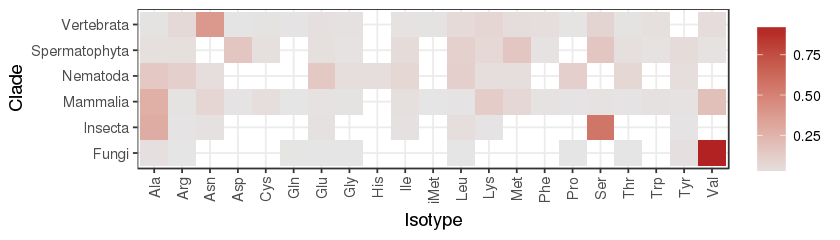

In [26]:
options(repr.plot.width=7, repr.plot.height=2)
identities %>% select(clade, isotype, X11.24) %>%
  filter(!(X11.24 %in% c("C:G", "U:A"))) %>%
  group_by(clade, isotype) %>%
  summarize(count = n()) %>%
  group_by(clade) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_tile(aes(x = isotype, y = clade, fill = freq)) +
    scale_fill_continuous(low = 'gray90', high = 'firebrick') +
    labs(x = 'Isotype', y = 'Clade', fill = '') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))

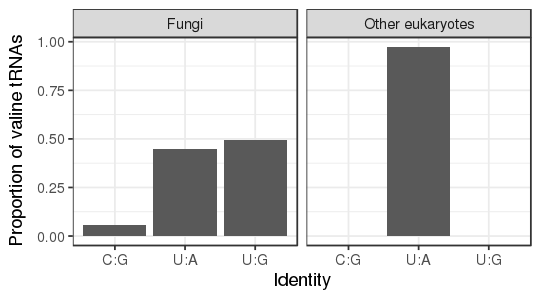

In [27]:
options(repr.plot.width=4.5, repr.plot.height=2.5)
identities %>% select(clade, isotype, X11.24) %>%
  filter(isotype == "Val") %>%
  mutate(clade=ifelse(clade == "Fungi", "Fungi", "Other eukaryotes")) %>%
  group_by(clade) %>%
  mutate(total=n()) %>%
  group_by(clade, total, X11.24) %>%
  summarize(count=n()) %>%
  mutate(freq=count/total) %>%
  filter(freq >= 0.01) %>%
  ggplot() + geom_bar(aes(x = X11.24, y = freq), stat = 'identity') + 
    labs(x = 'Identity', y = 'Proportion of valine tRNAs') + facet_wrap(~ clade)